# Linear Regression Project

**Situation**: An Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

<code style="color:blue">Linear Regression is used for finding out the relationship between variables and forecasting. The linear model assumes that the data is linearly separable and tries to learn the weight of each feature</code>

### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') 
%matplotlib inline

### Get the Data

The Ecommerce Customers csv file from the company has Customer info, Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Exploratory Data Analysis

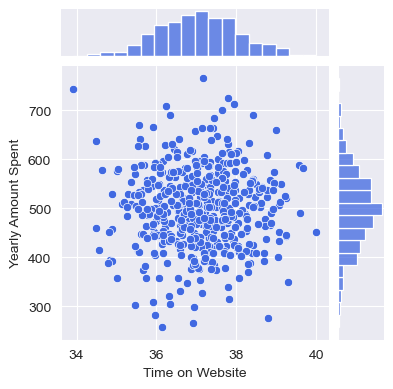

In [5]:
# Using the numerical data of the csv file for to do some analysis
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, height=4, color='royalblue')

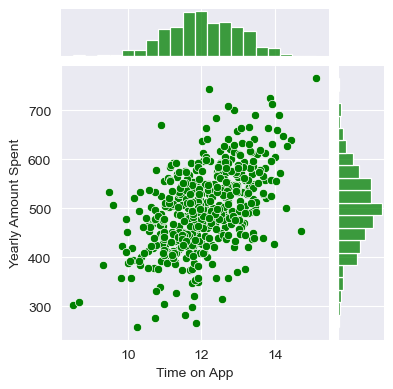

In [6]:
# Doing the same but with the Time on App column instead
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, height=4, color='green')

Here, we can see a correlation between the variables. So, probably when the time spent on app increase the Yearly Amount Spent also increase

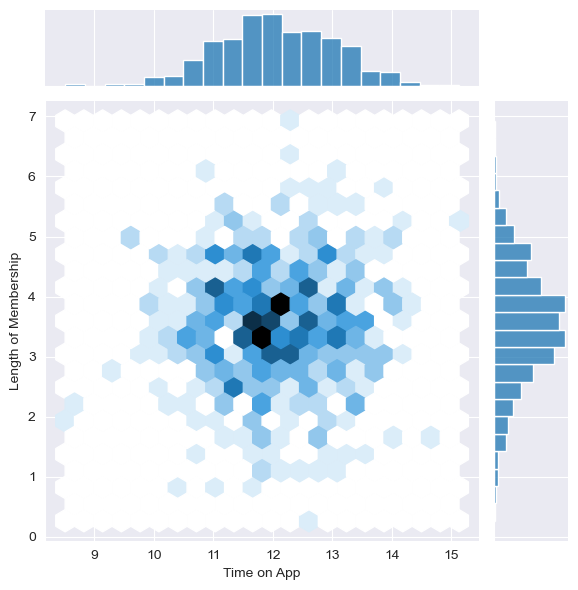

In [7]:
# Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.
sns.jointplot(x=df['Time on App'], y=df['Length of Membership'], kind='hex')

Exploring these types of relationships across the entire data set. Using [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot)

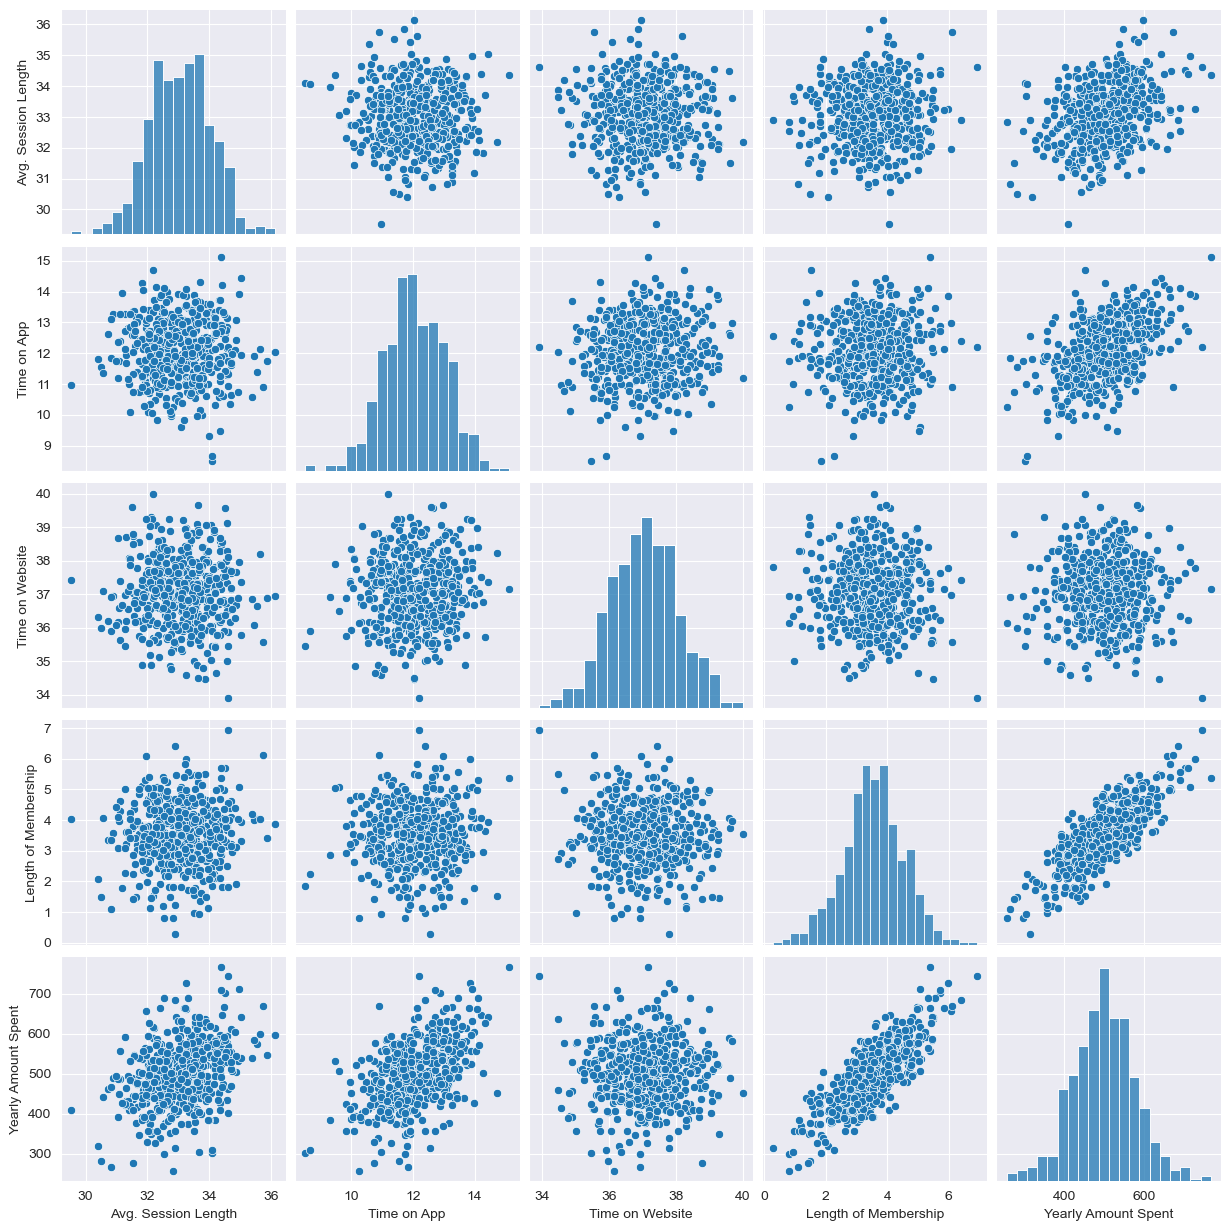

In [8]:
sns.pairplot(df)

Based off this plot, we can see that the most correlated feature with Yearly Amount Spent is Length of Membership

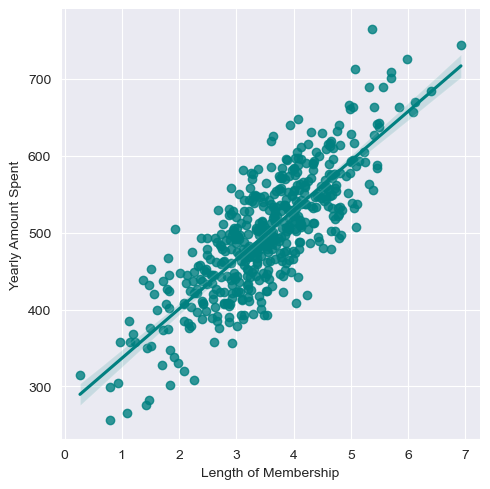

In [9]:
# Creating a linear model plot of  Yearly Amount Spent vs. Length of Membership
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df, scatter_kws={'color': 'teal'}, line_kws={'color': 'teal'})

___
## Machine Learning Section - Linear Regression



### Training and Testing Data

I splited the data into training and testing sets for start to develop the machine learning model 

In [10]:
# Seting a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent"
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']] #feature. Same as -> df.drop('Yearly Amount Spent', axis=1)
y = df['Yearly Amount Spent'] #target

In [11]:
# Using model_selection.train_test_split from sklearn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

In [12]:
# Importing LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create an instance of a LinearRegression() model named lm
lm = LinearRegression()

In [13]:
# Train/fit lm on the training data
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
# Coefficients of the model
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


### Predicting Test Data

Evaluating the model performance by predicting off the test values

In [15]:
# Using lm.predict() to predict off the X_test set of the data
predictions = lm.predict(X_test)

<AxesSubplot:xlabel='Yearly Amount Spent'>

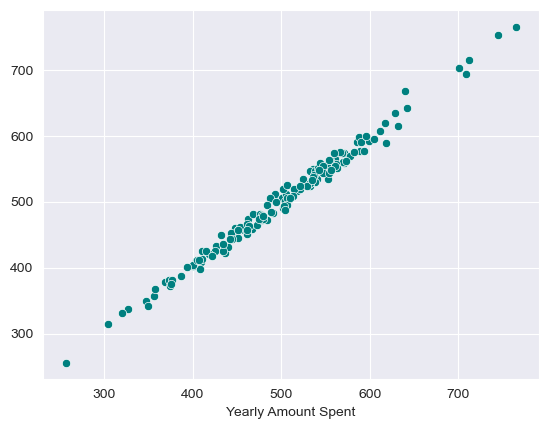

In [16]:
# Creating a scatterplot of the real test values versus the predicted values to compare
sns.scatterplot(x=y_test, y=predictions, color='teal')

Here we can see that the model fit well on the data we had set aside to test it after training

### Evaluating the Model

For more details, we can valuate the model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [17]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.2281486534308215
MSE: 79.81305165097433
RMSE: 8.933815066978626


In [18]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889607

### Residuals

Exploring the residuals to make sure everything was okay with the data. 

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

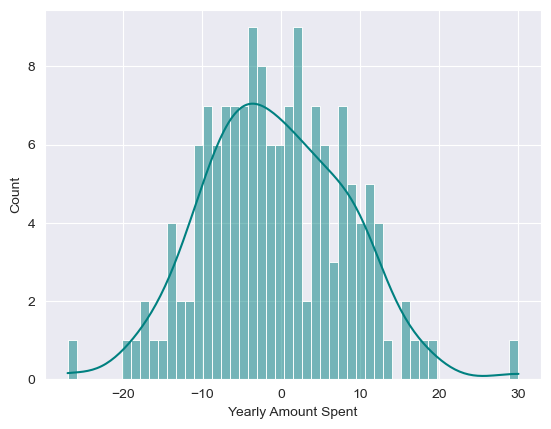

In [19]:
# Ploting a histogram of the residuals and make sure it looks normally distribute
sns.histplot((y_test - predictions), bins=50, color='teal', kde=True )

### Conclusion

The main question fo this problem was if the company should focus the efforst on mobile app or website development
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development or maybe that doesn't even matter, and Membership Time is what is really important.  

In [20]:
# Regression Coefficient
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


I used the regression coefficient because it represent the average change in the response variable for a unit change in the predictor variable (in this case Yearly Amount Spent in dolars), keeping the other predictors constant in the model. So this is important because it isolates the role of one variable from all others in the model.

Thus, we can see that Length of Membership has a big impact in the Yearly Amount Spent, follow by Time on App. So fix all features and improve by 1 the Length of Membership increase $61.27 in the Yearly Amount Spent. Said that and returns to the main question of the problem (ps: it would also be interesting to analyze the company's strategies to answer the question more assertively), I believe that the best way would be:

**Knowing that the tendency of companies is to be Omnichannel (simultaneous and interconnected use of different communication channels), then I believe that the company should focus efforts on improving the website, since it is showing a much lower return than when compared to the App, i.e. analyzing the user journey and understanding the pain points**

## Thanks!

**Nícolas de Souza**